# Самостоятельное задание

Задано оригинальное изображение. Вывести восстановленное изображение без шума. 

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

Создадим функцию, которая будет генерировать зашумленное изображение. Для этого можно использовать библиотеку random, чтобы добавлять шум к каждому пикселю изображения.

In [52]:
def generate_noisy_image(image):
    noisy_image = np.zeros(image.shape, np.uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            noise = random.randint(-50, 50)
            noisy_image[i][j] = image[i][j] + noise
    return noisy_image

Загружаем изображение и делаем его зашумленным

In [53]:
image = cv2.imread('img/mort.jpg')
noisy_image = generate_noisy_image(image)

Создаем функцию, которая будет обрабатывать изображение и возвращать восстановленное изображение без шума, где применяем фильтр медианной фильтрации для удаления шума и фильтр Гаусса для сглаживания изображения

In [54]:
def restore_image(image):
    restored_image = np.copy(image)
    restored_image = cv2.medianBlur(restored_image, 3)
    restored_image = cv2.GaussianBlur(restored_image, (5, 5), 0)
    return restored_image

Восстанавливаем изображение при помощи функции restored_image

In [56]:
restored_image = restore_image(noisy_image)

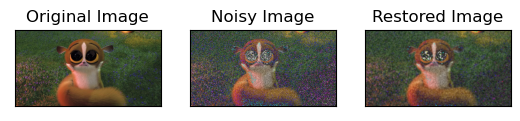

In [57]:
plt.subplot(131),plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)),
plt.title('Original Image')

plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB)),
plt.title('Noisy Image')

plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(cv2.cvtColor(restored_image, cv2.COLOR_BGR2RGB)),
plt.title('Restored Image')
plt.xticks([]), plt.yticks([])
plt.show()